In [ ]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# Задание № 1 
Вам даны результаты проверки двух препаратов.
Требуется:

* Оценить, есть ли различие в эффекте у этих пациентов?
* Визуально подтвердить результат

A - результаты для группы людей получающих препарат А.

B - результаты для другой группы людей, получающих препарат B.

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [ ]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

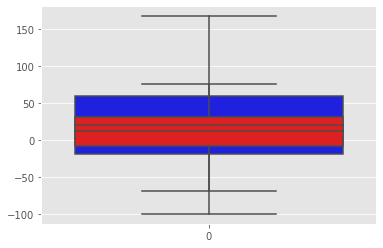

In [ ]:
#p больше 5%, т.е. различия не значимые

sns.boxplot(data = B, color = 'blue')
sns.boxplot(data = A,color = 'red')

# Задание № 2 
Вам даны результаты проверки двух препаратов.
Требуется:

* Оценить, есть ли различие в эффекте у этих пациентов?
* Визуально подтвердить результат

А - группа людей без препарата.

B - та же группа людей, но получающая препарат

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

In [ ]:
fvalue, pvalue = stats.f_oneway(A, B)
fvalue, pvalue

(3.0060646842692673, 0.08451003973499746)

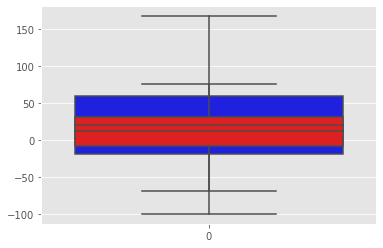

In [ ]:
# p больше 5%, т.е. различия не значимые (да и данные у нас не отличаются от предыдущего примера)
sns.boxplot(data = B, color = 'blue')
sns.boxplot(data = A,color = 'red')

# Задание № 3 
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой.
* Используя дисперсионный анализ, сделайте выводы о распредлениях результатов/ Есть ли эффект от удобрения по сравнению с минералкой?
* Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью boxplot или hist

In [ ]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

In [ ]:
fvalue, pvalue = stats.f_oneway(nutri, mineral)
fvalue, pvalue

(18.128724672228838, 0.0001213673340124552)

In [ ]:
fvalue, pvalue = stats.f_oneway(water, nutri, mineral)
fvalue, pvalue

(12.525963044834192, 2.9240047906326866e-05)

(array([4., 0., 0., 0., 0., 5., 0., 0., 0., 0., 5., 0., 0., 0., 0., 5., 0.,
        0., 0., 2.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
        3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 20 Patch objects>)

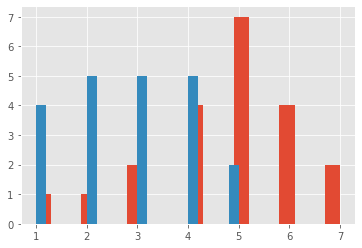

In [ ]:
# p меньше 0.5 Эффект есть.
plt.hist(nutri, bins=20)
plt.hist(mineral, bins=20)

# **ПОКЕМОНЫ**
# Задание № 1:
Профессор Оук подозревает, что покемоны в классе grass имеют более сильную обычную атаку, чем у покемонов в классе rock. Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;

Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [ ]:
pokemon = pd.read_csv('/content/drive/MyDrive/pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
grass = pokemon[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) 
                | ((pokemon['Class 2'] == 'Grass') & (pokemon['Class 1'] != 'Rock'))]
grass.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False


In [ ]:
rock = pokemon[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')) 
                | ((pokemon['Class 2'] == 'Rock') & (pokemon['Class 1'] != 'Grass'))]
rock.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


In [ ]:
stats.ttest_ind(grass['Attack'], rock['Attack'])

Ttest_indResult(statistic=-3.729457582692065, pvalue=0.00027333381459902653)

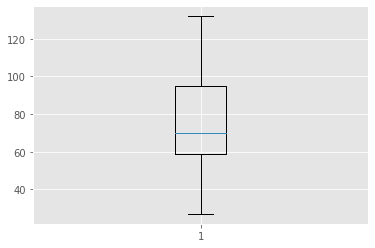

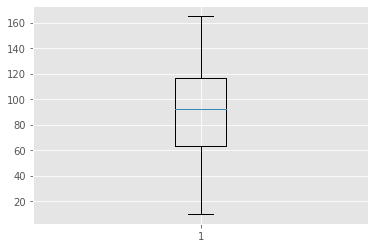

In [ ]:
# Распределения "травы" и "камня" не связаны друг с другом

plt.boxplot(grass['Attack'])
plt.show()
plt.boxplot(rock['Attack'])
plt.show()

In [ ]:
print(grass['Attack'].mean(), rock['Attack'].mean())

# По графикам и среднему видно, что каменные покемоны сильнее травяных.

73.73118279569893 91.78571428571429


# Задание № 2:
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе Water в среднем более быстрые, чем покемоны в классе Normal.

Проверьте, прав ли он, и убедите его в своем выводе статистически.

Примечание: если есть покемоны относятся к обоим классам, выбросьте их;

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [ ]:
water = pokemon[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) 
                | ((pokemon['Class 2'] == 'Water') & (pokemon['Class 1'] != 'Normal'))]
water.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,False


In [ ]:
normal = pokemon[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')) 
                | ((pokemon['Class 2'] == 'Normal') & (pokemon['Class 1'] != 'Water'))]
normal.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False


In [ ]:
stats.ttest_ind(water['Speed'], normal['Speed'])

Ttest_indResult(statistic=-2.150913330007121, pvalue=0.03255353551391033)

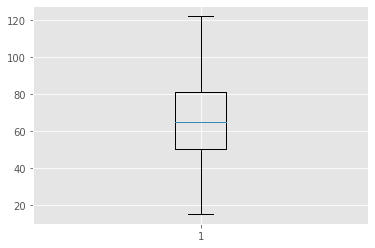

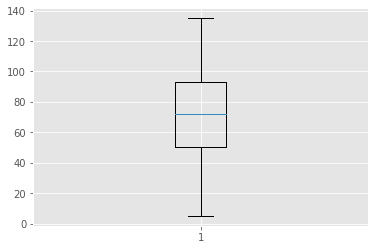

In [ ]:
#Распределения скоростей "воды" и "нормальных" не созависимы

plt.boxplot(water['Speed'])
plt.show()
plt.boxplot(normal['Speed'])
plt.show()

In [ ]:
print(water['Speed'].mean(), normal['Speed'].mean())

# Обычные покемоны в среднем быстрее водяных

64.936 72.25742574257426


# Задание № 3 и №4:
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
treathed = pokemon[pokemon['Name'].isin(treathed_pokemon)]
treathed

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [ ]:
not_treathed = pokemon[~pokemon['Name'].isin(treathed_pokemon)]
not_treathed.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
stats.ttest_ind(treathed['Speed'], not_treathed['Speed'])

Ttest_indResult(statistic=5.385407401082377, pvalue=9.51510117630786e-08)

In [ ]:
# Сыворотка работает, p гораздо меньше 5%

# Задание № 5:
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [ ]:
legend = pokemon[pokemon['Legendary']]
legend.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True


In [ ]:
not_legend = pokemon[~pokemon['Legendary']]
not_legend.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [ ]:
stats.ttest_ind(legend.loc[:, 'HP':'Defense'].sum(1), not_legend.loc[:, 'HP':'Defense'].sum(1))

Ttest_indResult(statistic=11.591852366462316, pvalue=7.970942205722087e-29)

In [ ]:
stats.ttest_ind(legend['HP'] * legend['Attack'] * legend['Defense'], 
                not_legend['HP'] * not_legend['Attack'] * not_legend['Defense'])

Ttest_indResult(statistic=13.263253408231844, pvalue=1.992664308842282e-36)

In [ ]:
# Легендарные лучше остальных покемонов

# Задание № 6:
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса best_defence_class, которые на его взгляд одинаковы по "силе обычной защиты" Defense. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь!

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
fvalue, pvalue = stats.f_oneway(pokemon[pokemon['Class 1'] == 'Rock']['Defense'],  
                                pokemon[pokemon['Class 1'] == 'Ground']['Defense'],
                                pokemon[pokemon['Class 1'] == 'Steel']['Defense'],
                                pokemon[pokemon['Class 1'] == 'Ice']['Defense'])
fvalue, pvalue

(10.576882027817977, 3.0803014649204294e-06)

In [ ]:
# Покемоны этих классов значимо отличаются друг от друга по уровню защиты